In [1]:
!python main.py --device cuda --dataset gene --dsid 1 --model eSRU_1LF --n 100 --T 966 --F 0 --nepochs 2000 --mu1 0.021544 --mu2 0.031623 --mu3 0.464159 --lr 0.001 --joblog crossval/logs/test.npz

Computational Resource: cuda
node = 0
1641
Predicted Node = 0 	 epoch = 46 	 lr = 0.0009 	 Training loss = 178.1024 	 Fit error = 176.3606 	 Delta = 0.000400
Elapsed time (1) = 0.029973268508911133 seconds
Predicted Node = 0 	 epoch = 92 	 lr = 0.0008 	 Training loss = 42.0236 	 Fit error = 40.3164 	 Delta = 0.000070
Elapsed time (1) = 0.06562399864196777 seconds
Predicted Node = 0 	 epoch = 138 	 lr = 0.0007 	 Training loss = 55.5057 	 Fit error = 53.8812 	 Delta = 0.000086
Elapsed time (1) = 0.04596662521362305 seconds
Predicted Node = 0 	 epoch = 184 	 lr = 0.0006 	 Training loss = 42.1366 	 Fit error = 40.5771 	 Delta = 0.000097
Elapsed time (1) = 0.02998661994934082 seconds
Predicted Node = 0 	 epoch = 230 	 lr = 0.0006 	 Training loss = 37.3875 	 Fit error = 35.8919 	 Delta = 0.000075
Elapsed time (1) = 0.03969550132751465 seconds
Predicted Node = 0 	 epoch = 276 	 lr = 0.0005 	 Training loss = 31.5373 	 Fit error = 30.0934 	 Delta = 0.000039
Elapsed time (1) = 0.03125 seconds
Pr

Elapsed time (1) = 0.031250715255737305 seconds
Predicted Node = 6 	 epoch = 322 	 lr = 0.0004 	 Training loss = 18.0693 	 Fit error = 16.7349 	 Delta = 0.000021
Elapsed time (1) = 0.06252336502075195 seconds
Predicted Node = 6 	 epoch = 368 	 lr = 0.0004 	 Training loss = 17.9557 	 Fit error = 16.6610 	 Delta = 0.000015
Elapsed time (1) = 0.023644447326660156 seconds
Predicted Node = 6 	 epoch = 414 	 lr = 0.0004 	 Training loss = 18.1365 	 Fit error = 16.8762 	 Delta = 0.000012
Elapsed time (1) = 0.046875 seconds
Predicted Node = 6 	 epoch = 460 	 lr = 0.0003 	 Training loss = 18.5883 	 Fit error = 17.3550 	 Delta = 0.000009
Elapsed time (1) = 0.0312497615814209 seconds
Elapsed time (1) = 15.676586151123047 seconds
node = 7
1641
Predicted Node = 7 	 epoch = 46 	 lr = 0.0009 	 Training loss = 9.5372 	 Fit error = 7.8369 	 Delta = 0.000052
Elapsed time (1) = 0.04687786102294922 seconds
Predicted Node = 7 	 epoch = 92 	 lr = 0.0008 	 Training loss = 6.5592 	 Fit error = 4.9435 	 Delta =

node = 79
1641
Predicted Node = 79 	 epoch = 46 	 lr = 0.0009 	 Training loss = 17.5394 	 Fit error = 15.8381 	 Delta = 0.000118
Elapsed time (1) = 0.0289914608001709 seconds
Predicted Node = 79 	 epoch = 92 	 lr = 0.0008 	 Training loss = 13.0176 	 Fit error = 11.3985 	 Delta = 0.000032
Elapsed time (1) = 0.03597378730773926 seconds
Predicted Node = 79 	 epoch = 138 	 lr = 0.0007 	 Training loss = 12.1190 	 Fit error = 10.5780 	 Delta = 0.000028
Elapsed time (1) = 0.029992103576660156 seconds
Predicted Node = 79 	 epoch = 184 	 lr = 0.0006 	 Training loss = 11.5091 	 Fit error = 10.0401 	 Delta = 0.000026
Elapsed time (1) = 0.029993295669555664 seconds
Predicted Node = 79 	 epoch = 230 	 lr = 0.0006 	 Training loss = 10.9316 	 Fit error = 9.5281 	 Delta = 0.000024
Elapsed time (1) = 0.0329892635345459 seconds
Predicted Node = 79 	 epoch = 276 	 lr = 0.0005 	 Training loss = 10.4522 	 Fit error = 9.1076 	 Delta = 0.000021
Elapsed time (1) = 0.02999591827392578 seconds
Predicted Node = 

In [3]:
import numpy as np

In [4]:
a = np.load('./crossval/logs/test.npz')
sru_gc = a['Gest']
gc = a['Gref']

In [6]:
len(sru_gc[0])

100

In [21]:
sru_gc_th = np.zeros([100,100])
th = 0.5
for i in range(100):
    for j in range(100):
        if sru_gc[i][j] >= th :
            sru_gc_th[i][j] = 1
        else:
            sru_gc_th[i][j] = 0
            

True variable usage = 1.25%
Estimated variable usage = 0.16%
Accuracy = 98.59%


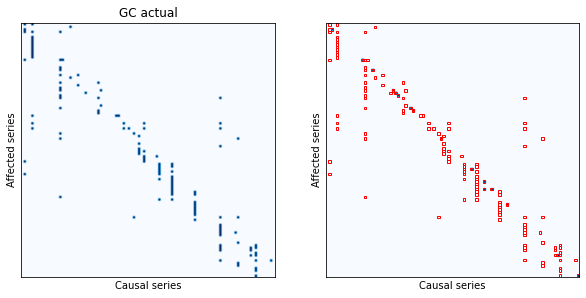

In [22]:
import matplotlib.pyplot as plt
print('True variable usage = %.2f%%' % (100 * np.mean(gc)))
print('Estimated variable usage = %.2f%%' % (100 * np.mean(sru_gc_th)))
print('Accuracy = %.2f%%' % (100 * np.mean(gc == sru_gc_th)))

# Make figures
fig, axarr = plt.subplots(1, 2, figsize=(10, 5))
axarr[0].imshow(gc, cmap='Blues')
axarr[0].set_title('GC actual')
axarr[0].set_ylabel('Affected series')
axarr[0].set_xlabel('Causal series')
axarr[0].set_xticks([])
axarr[0].set_yticks([])

axarr[1].imshow(sru_gc_th, cmap='Blues', vmin=0, vmax=1, extent=(0, len(sru_gc_th), len(sru_gc_th), 0))
axarr[1].set_ylabel('Affected series')
axarr[1].set_xlabel('Causal series')
axarr[1].set_xticks([])
axarr[1].set_yticks([])

# Mark disagreements
for i in range(len(sru_gc_th)):
    for j in range(len(sru_gc_th)):
        if gc[i, j] != sru_gc_th[i, j]:
            rect = plt.Rectangle((j, i-0.05), 1, 1, facecolor='none', edgecolor='red', linewidth=1)
            axarr[1].add_patch(rect)

plt.show()